In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

from sklearn.metrics import r2_score
from scipy.stats import pearsonr

from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
from google.colab import files
uploaded=files.upload()

Saving Linear Regression.csv to Linear Regression.csv


In [6]:
import io

In [7]:
df=pd.read_csv(io.BytesIO(uploaded['Linear Regression.csv']))

In [6]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0



We have to predict the Price of the house , how much other factors are affecting Price

Target Variable (Price) is Continous

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [8]:
df.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [8]:
df.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


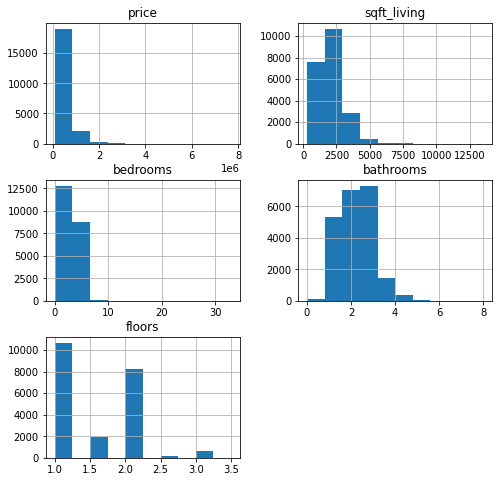

In [10]:

df.hist(figsize=(8,8))
plt.show()

Inference from Histogram:¶
* Bathrooms is Unimodal and has negative Skewness ie Mean < Median
* Bedrooms is Unimodal and has positive Skewness ie Mean > Median
* Price is Unimodal and has positive Skewness ie Mean > Median
* Sqft_living is Unimodal and has positive Skewness ie Mean > Median
* Floors is Multimodal

# **EDA**

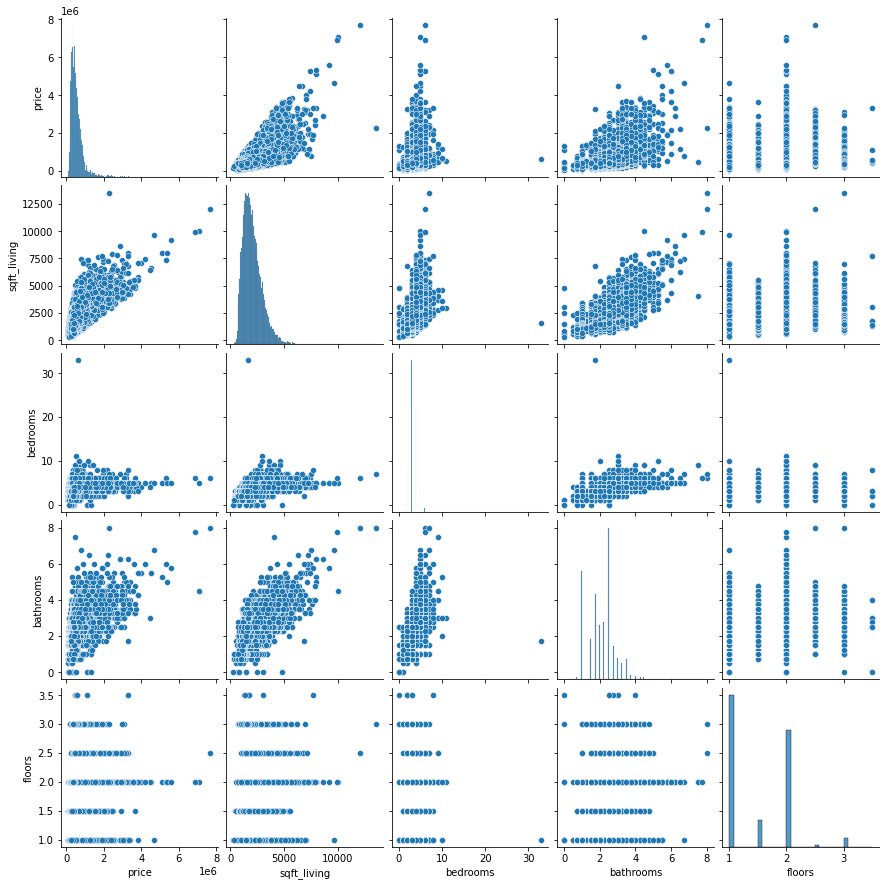

In [11]:
sns.pairplot(df)

**Finding Relationship Between variables**

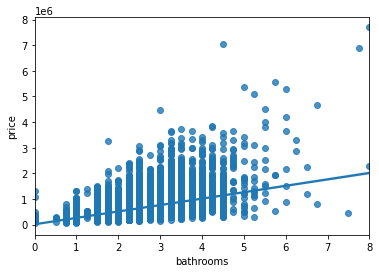

In [12]:
sns.regplot(df.bathrooms, df.price)

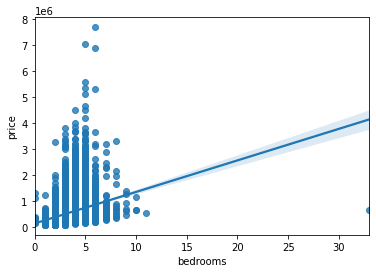

In [13]:
sns.regplot(df.bedrooms, df.price)

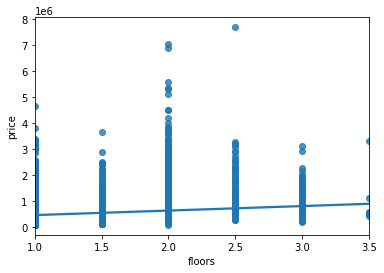

In [14]:
sns.regplot(df.floors, df.price)

The Dependent variable "price" :

* It has Strong Relation with area of living in square feet
* It has moderate Relation with number of bathrooms and bedrooms
* It has almost no Relation with number of floors.

**Finding Outliers using Boxplot**

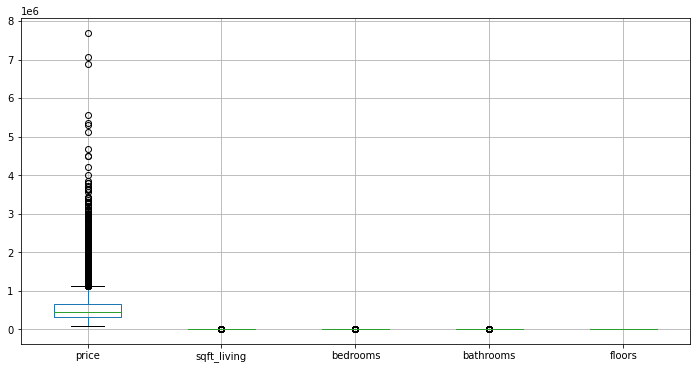

In [15]:

df.boxplot(figsize=(12,6))
plt.show()

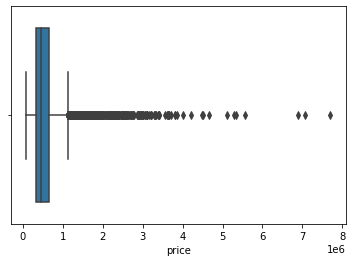

In [12]:
sns.boxplot(df['price'])

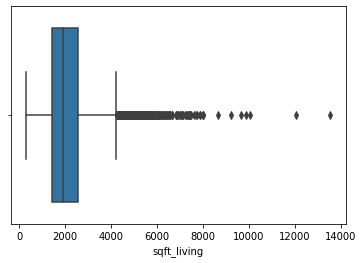

In [17]:

sns.boxplot(df['sqft_living'])

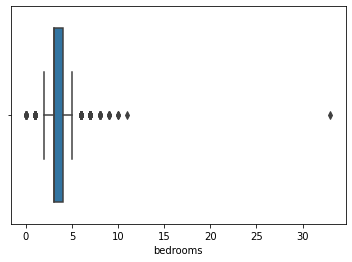

In [18]:
sns.boxplot(df['bedrooms'])

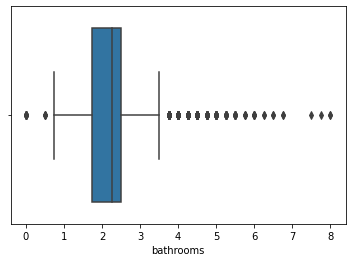

In [19]:
sns.boxplot(df['bathrooms'])

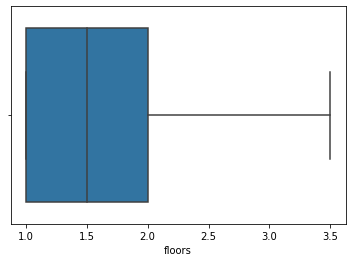

In [20]:
sns.boxplot(df['floors'])

Inference from Boxplot
* The Dependent Variable (Price) has many Outliers
* Square feet Living has many Outliers
* Bedrooms has Moderate Outliers but It also include an Extreme Outlier(which can be removed from dataset)
* Bathroms has Moderate Outliers
* Floors has No Outlier

**Correlation Matrix**

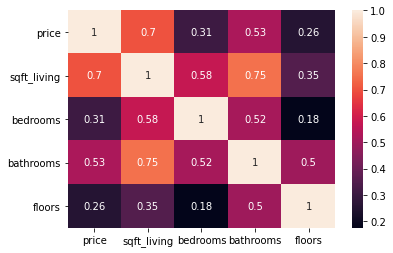

In [21]:
sns.heatmap(df.corr(),annot=True)

The Target variable 'price' has :

* Strong correlation with area of living in square feet
* Moderate correlation with number of bathrooms and bedrooms
* almost No correlation with number of floors.

Applying Linear Regression
* Target Variable is Price which is a Continous Variable

**MODEL-1**

Price V/S area of living in square feet (sqft_living)

* where Price is Dependent Variable and sqft_living is Independent Variable

In [13]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [14]:
x = df.iloc[:,1:2]
x.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [15]:
y = df.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


Spliting Dataset into Training and Test Set

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

Fitting linear model

In [17]:
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Framing Equation

In [18]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [-41947.45007397]
Coefficient is:  [[279.51011494]]


Equation is:

price = - 41947.45007397 + 279.51011494 (sqft_living)

Predecting values

In [19]:
ypred = lin_reg.predict(x_test)
print("Predicted values:\n")
print(ypred)

Predicted values:

[[ 536638.48784377]
 [ 768631.88324074]
 [1011805.68323515]
 ...
 [ 279489.18210255]
 [ 556204.1958893 ]
 [ 659622.93841566]]


r-square value

In [20]:
print("r square value is: ", r2_score(y_test, ypred))

r square value is:  0.48388318901296545


p value

In [21]:
stats, p = pearsonr(df.price, df.sqft_living)
print('The r value is {} and p value is {}'.format(stats,p))

The r value is 0.7020350524336836 and p value is 0.0


* R-square value is 0.48 suggesting that only about 48% of the variance in the target variable.
* p value is 0.0 which is less than 0.05 ie sqft_living is affecting Price of House

**MODEL 2**

Price V/S Bedrooms

* where Price is Dependent Variable and Bedrooms is Independent Variable

In [22]:
x1 = df.iloc[:,2:3]
x1.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


In [23]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


**Spliting Dataset into Training and Test Set**

In [24]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state = 2)

**Fitting Linear Model :**

In [25]:
lin_reg.fit(x1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Framing Equation**

In [26]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [142835.36507295]
Coefficient is:  [[118301.95858814]]


Equation is:

price = 142835.36507296 + 118301.95858814 (bedrooms)



**Predicting Values**

In [27]:
y_pred1 = lin_reg.predict(x1_test)
print("Predicted values:\n")
print(y_pred1)

Predicted values:

[[616043.19942552]
 [497741.24083738]
 [379439.28224924]
 ...
 [616043.19942552]
 [497741.24083738]
 [616043.19942552]]


**Calculating R-square value**

In [28]:
print("The r square value is: ", r2_score(y1_test, y_pred1))

The r square value is:  0.10373065781231283


P VALUE

In [ ]:
Calculating p value

In [29]:
stats, p = pearsonr(df.price, df.bedrooms)
print('The r value is {} and p value is {}'.format(stats,p))

The r value is 0.3083495978848225 and p value is 0.0


Inference from Model2:
* R-square value is 0.10 suggesting that only about 10% of the variance in the target variable.
* p value is 0.0 which is less than 0.05 ie bedrooms is affecting Price of House

**MODEL 3**

Price V/S Bathrooms

* where Price is Dependent Variable and Bathrooms is Independent Variable

In [30]:
x2 = df.iloc[:,3:4]
x2.head()

,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00


In [31]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


**Spliting Dataset into Training and Test Set**

In [32]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y,test_size=0.3,random_state=2)

**Fitting Linear Model :**

In [33]:
lin_reg.fit(x2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Framing Equation**

In [34]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [13513.13889573]
Coefficient is:  [[249375.03130974]]


Equation is:

price = 13513.13889573 + 249375.03130974 (bathrooms)

**Predicting Values**

In [35]:
y_pred2=lin_reg.predict(x2_test)
print("Predicted values:\n")
print(y_pred2)

Predicted values:

[[574606.95934264]
 [387575.68586034]
 [262888.17020547]
 ...
 [636950.71717008]
 [574606.95934264]
 [449919.44368777]]


**Calculating R-square value**

In [36]:
print("The r square value is: ", r2_score(y2_test, y_pred2))

The r square value is:  0.2729690023991552


Calculating p value

In [37]:
stats, p = pearsonr(df.price, df.bathrooms)
print('The r value is {} and p value is {}'.format(stats,p))

The r value is 0.5251375045796024 and p value is 0.0


Inference from Model3:
* R-square value is 0.27 suggesting that only about 27% of the variance in the target variable.
* p value is 0.0 which is less than 0.05 ie bathrooms is affecting Price of House


MODEL 4

Price V/S Floors

where Price is Dependent Variable and floors is Independent Variable

In [38]:
x3 = df.iloc[:,4:]
x3.head()

,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


In [39]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


**Spliting Dataset into Training and Test Set**

In [40]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y,test_size=0.3,random_state=2)

**Fitting Linear Model :**

In [41]:
lin_reg.fit(x3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Framing Equation**

In [42]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [283855.89650181]
Coefficient is:  [[171935.92961605]]



Equation is:

price = 283855.89650181 + 171935.92961605 (floors)

**Predicting Values**

In [43]:
y_pred3 =lin_reg.predict(x3_test)
print("Predicted values:\n")
print(y_pred3)

Predicted values:

[[541759.79092589]
 [455791.82611786]
 [455791.82611786]
 ...
 [627727.75573391]
 [627727.75573391]
 [541759.79092589]]


**Calculating R-square value**

In [44]:
print("The r square value is: ", r2_score(y3_test, y_pred3))

The r square value is:  0.06879667978104298


**Calculating p value**

In [45]:
stats, p = pearsonr(df.price, df.floors)
print('The r value is {} and p value is {}'.format(stats,p))

The r value is 0.25679388406334097 and p value is 1.6e-322


Inference from Model4:
* R-square value is 0.06 suggesting that only about 6% of the variance in the target variable.
* p value is 1.6e-322 which is less than 0.05 ie floors is affecting Price of House

MODEL 5

Price as Dependent Variable and all Other Variables as Independent Variable

In [46]:
x4 = df.drop(['price'], axis=1)
x4.head()

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0


In [47]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


**Spliting Dataset into Training and Test Set**

In [48]:
x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y,test_size=0.3,random_state=2)

**Fitting Linear Model :**

In [49]:
lin_reg.fit(x4_train,y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Framing Equation**

In [50]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [73808.86183529]
Coefficient is:  [[   306.72838252 -55720.77178327   8705.50888837   -266.52957882]]


Equation is:

price = 73808.86183529 + 306.72838252(sqft_living) - 55720.77178327(bedrooms) + 8705.50888837(bathrooms) - 266.52957882(floors)

**Predicting Values**

In [51]:
y_pred4 = lin_reg.predict(x4_test)
print("Predicted values:\n")
print(y_pred4)

Predicted values:

[[609328.77721079]
 [585038.87031192]
 [415562.45223517]
 ...
 [599102.75434259]
 [339784.19873135]
 [516024.79183523]]


**Calculating R-square value**

In [52]:
print("The r square value is: ", r2_score(y4_test, y_pred4))

The r square value is:  0.5105722437453337


Inference from Model5:
* R-square value is 0.51 suggesting that only about 51% of the variance in the target variable.